## Fish Fry Locations in Pittsburgh
One of the most important things a computer science student can get to function well and succeed is some great food, so I chose a dataset containing a comprehensive list of Fish Fry resturants and their locations in Pittsburgh to rank which neighborhoods you could get the best food in.

### Step 1: Getting Our Data

In [124]:
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt

# Load in our data
csv = pd.read_csv("ResturantData.csv")

# Display
resturantData = pd.DataFrame(csv)
resturantData.head()

,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,menu_text,venue_notes,...,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,False,Holy Cross (Reilly Center),Church,"7100 West Ridge Road, Fairview, PA",https://www.holycrossfairview.org,NaN,NaN,NaN,No Fish Fry at this time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,42.039710,-80.245022
1,True,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-...,"Friday Feb 19 from 4:00 PM to 8:00 PM, Friday ...",NaN,NaN,NaN,NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.352969,-79.767295
2,True,"Our Lady of Joy, Holiday Park",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 17 from 4:00 PM to 7:00 PM, Frid...",Lunch is 11am-1pm.,NaN,"Menu: beer battered, fried/baked or gluten fre...",NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.480007,-79.719563
3,True,St. John Benwood,Church,"700 Main Street, Benwood, West Virginia 26031,...",https://www.facebook.com/stjohnparishbenwoodwv/,"Friday Feb 26 from 11:00 AM to 6:00 PM, Friday...",NaN,https://www.facebook.com/stjohnparishbenwoodwv...,NaN,St John Benwood Fellowship Hall,...,NaN,False,True,NaN,True,NaN,True,NaN,40.016004,-80.734844
4,True,Historic Church of St. Peter,Church,"118 Church Street, Brownsville, Pennsylvania 1...",http://www.stpeterstcecilia.org/home-2,"Wednesday Feb 17 from 11:00 AM to 2:00 PM, Wed...",NaN,http://www.stpeterstcecilia.org/bulletins,See menu link,NaN,...,NaN,True,True,NaN,True,NaN,True,NaN,40.023986,-79.881267


#### This dataset has a lot of unnescesary information, lets clean it up to just what we need.

In [11]:
# Clear up our data for what we need
resturantData = resturantData[["venue_name", "venue_address", "latitude", "longitude", "homemade_pierogies"]]
resturantData.head()

,venue_name,venue_address,latitude,longitude,homemade_pierogies
0,Holy Cross (Reilly Center),"7100 West Ridge Road, Fairview, PA",42.039710,-80.245022,NaN
1,Hartford Heights Volunteer Fire Department,"14335 U.S. 30, Irwin, PA 15642",40.352969,-79.767295,False
2,"Our Lady of Joy, Holiday Park","2000 O'Block Road Holiday Park, PA",40.480007,-79.719563,False
3,St. John Benwood,"700 Main Street, Benwood, West Virginia 26031,...",40.016004,-80.734844,False
4,Historic Church of St. Peter,"118 Church Street, Brownsville, Pennsylvania 1...",40.023986,-79.881267,True


#### Getting neighborhoods
Unfortunetly, this dataset did not include neighborhoods but rather a longitude and latitude for each locations, which is not very helpful for us by itself. So I imported a python geography library and used it to pull the neighborhood from each longitude and latitude. This code did take a few minutes to run, so I filled all of this data into a text file so I could use it later on and more efficiently.

In [ ]:
## import geopy
## from geopy.geocoders import Nominatim
## from geopy.extra.rate_limiter import RateLimiter
## 
## geolocator = Nominatim(user_agent="example app")
## 
## print("Starting")
## for index, row in resturantData.iterrows():
##     lat = row["latitude"]
##     long = row["longitude"]
##     hasPierogies = row["homemade_pierogies"]
##     
##     coordinates = str(lat) + ", " + str(long)
##     location = geolocator.reverse(coordinates)
##     
##     # Make sure we're in Pittsburgh
##     try:
##         city = location.raw['address']['city']
##         if (city != "Pittsburgh"):
##             continue
##     except:
##         continue
##     
##     try:
##         n = location.raw['address']['neighbourhood']
##         print(n)
##         if (hasPierogies):
##             print("Pierogies: " + n) # Extra point for having pierogies
##     except:
##         print("MISSING")
##         
## print("Finished")

### Step 2: Making Sense of Our Data
Now that I had all of the nescesary data, the first step was to grade each neighborhood based on the resturant data. For this each neighborhood started off with a basic score of 1 and was given an extra point for each fish fry resturant they had.

In [100]:
communityFishFryCount = {}

# Parsing our now stored neighborhood data
with open("Neighborhoods.txt") as file:
    neighborhoods = file.readlines()
    
for i in range(len(neighborhoods)):
    community = neighborhoods[i].replace('\n', '')
    communityFishFryCount[community] = 1
    
# Load in our neighborhood fish fry data
neighborhoodData = list("")
with open("FishFryNeighborhoodData.txt") as file:
    fishFryData = file.readlines()

for i in range(len(fishFryData)):
    fishFryData[i] = fishFryData[i].replace('\n', '')
    fishFryData[i] = fishFryData[i].replace(',', '')

# Add points to our dictionary, each resturant a neighborhood has gives it a point
for community in fishFryData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1

Some of these locations also offered homemade pierogies, so each location that had this was given an extra point.

In [101]:
# Load in our neighborhood pierogi data
neighborhoodData = list("")
with open("PierogiNeighborhoodData.txt") as file:
    neighborhoodData = file.readlines()
    
for i in range(len(neighborhoodData)):
    neighborhoodData[i] = neighborhoodData[i].replace('\n', '')
    neighborhoodData[i] = neighborhoodData[i].replace(',', '')

# Add points to our dictionary
for community in neighborhoodData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1

#### Visualizing Our Data
Now that we have all of our data organized, lets plot it onto a map of Pittsburgh.

<AxesSubplot:>

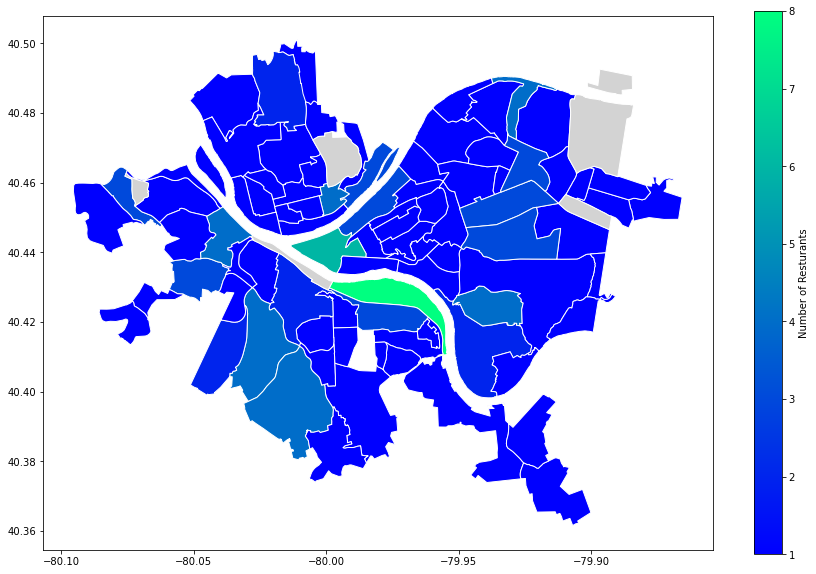

In [102]:
# Plot  our data using our dictionary
df = pd.DataFrame({"neighborhoods":communityFishFryCount.keys(), "count":communityFishFryCount.values()})
city = geo.read_file("Maps/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       edgecolor = "white",
       legend_kwds={'label': "Number of Resturants"})

### Step 3: Analysing Our Data
This data is good, but there is one problem. Many places, like Downtown, might have a lot of locations but also be a very crowded and heavily visited area. In order to account for this, I found another dataset that contained an average daily traffic amount for each neighborhood and used it to scale each neighborhoods score.

In [113]:
communityFinalCount = {}
communityTrafficCount = {}

# Loading in our data
csv = pd.read_csv("TrafficData.csv")

# Cleaning up the dataframe for what we need
trafficData = pd.DataFrame(csv)
trafficData = trafficData[["average_daily_car_traffic", "neighborhood"]]
trafficData = trafficData.dropna()

# For each item, add it to our dictionary for late use
for index, row in trafficData.iterrows():
    trafficCount = row["average_daily_car_traffic"]
    neighborhood = row["neighborhood"]
    
    if (trafficCount <= 0): continue
    
    if not neighborhood in communityTrafficCount:
        communityTrafficCount[neighborhood] = trafficCount

# Scale each neighborhoods data down
for key, value in communityFishFryCount.items():
    if key in communityTrafficCount:
        communityFinalCount[key] = int(communityFishFryCount[key] * 1000 / communityTrafficCount[key])
    else:
        communityFinalCount[key] = int(communityFishFryCount[key])

# Normalize our data so the top neighborhood's score is 100 and all the other neighborhoods ar scaled to that
communityFinalCount = dict(sorted(communityFinalCount.items(), key=lambda item: item[1], reverse = True))
highestValue = communityFinalCount[max(communityFinalCount, key=communityFinalCount.get)]

for key, value in communityFinalCount.items():
    communityFinalCount[key] = int((communityFinalCount[key] / (highestValue)) * 100)

#### Now lets display our final data

<AxesSubplot:>

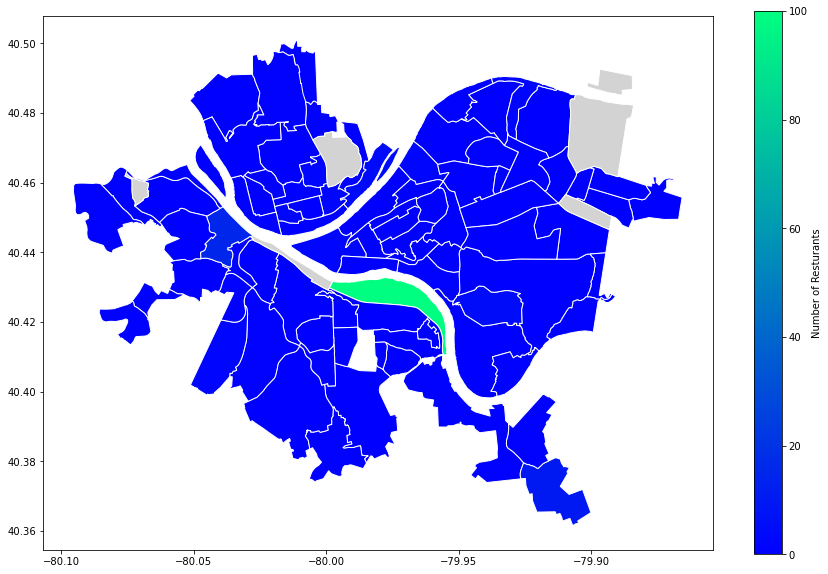

In [114]:
df = pd.DataFrame({"neighborhoods":communityFinalCount.keys(), "count":communityFinalCount.values()})
city = geo.read_file("Maps/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       edgecolor = "white",
       legend_kwds={'label': "Number of Resturants"})

### Conclusion
Because South Side Flats was already in the lead for the resturant count and barely got an traffic, it became the clear leader.

In [123]:
# Printing out our data

count = 0
for key, value in communityFinalCount.items():
    count += 1
    print(key + " had a score of " + str(value))
    if (count >= 5): break

South Side Flats had a score of 100
Elliott had a score of 15
Lincoln Place had a score of 10
Greenfield had a score of 5
Troy Hill had a score of 4
